# Introduction

Experiment 2 measures the performance of HEFT and the selected GA algorithm, against a random planner, in terms of makespan, keeping the campaign constant to 1024 workflows and changes the number of resources. The resources are heterogeneous and are drawn by a normal distribution with $\mu=1$ and $\sigma=0.5$.

The following figure shows a histogram of the 128 resources. Because the resources are selected from a normal distribution, any negative value is discarded.

In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint
import numpy as np
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
resources = pd.read_csv('heterogeneous_resources.csv')

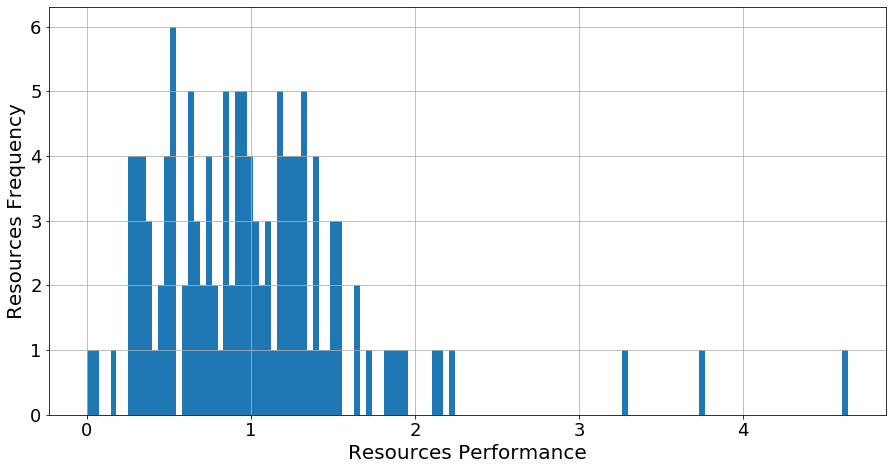

In [3]:
ax = resources['performance'].hist(bins=128, figsize=(15,7.5))
_ = ax.set_ylabel('Resources Frequency',fontsize=20)
_ = ax.set_xlabel('Resources Performance',fontsize=20)
_ = ax.set_xticklabels(ax.get_xticks().astype('int').tolist(),fontsize=18)
_ = ax.set_yticklabels(ax.get_yticks().astype('int').tolist(),fontsize=18)
_ = ax.grid('on')



# Homogeneous resources - Homogeneous workflows


In [4]:
HomogeResources_StHomogeCampaigns = pd.read_csv('HomogeResources_StHomogeCampaigns.csv')

HomogeResources_StHomogeCampaigns = HomogeResources_StHomogeCampaigns.groupby(by=['planner','size'])
HomogeResources_StHomogeCampaigns_makespan_means = HomogeResources_StHomogeCampaigns.mean()
HomogeResources_StHomogeCampaigns_makespan_stds = HomogeResources_StHomogeCampaigns.std()

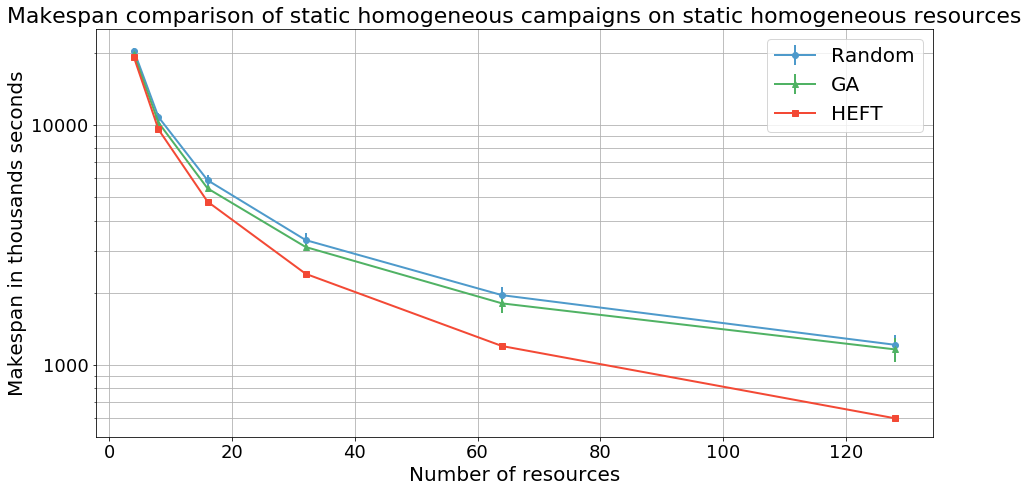

In [5]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values,HomogeResources_StHomogeCampaigns_makespan_stds.xs('RANDOM')['makespan'].values, color=blues(150),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('GA').index, HomogeResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values,HomogeResources_StHomogeCampaigns_makespan_stds.xs('GA')['makespan'].values, color=greens(150),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT').index,HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=reds(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.set_title('Makespan comparison of static homogeneous campaigns on static homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHomoCampaigns_4StHomoResources.png',bbox_inches='tight')

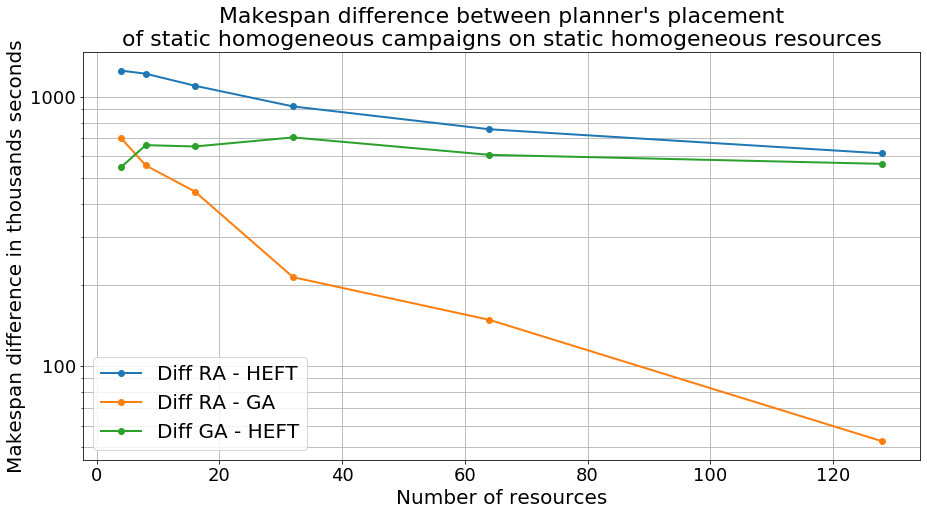

In [6]:
DiffStHomoCamp_4StHomoResHE = abs(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResGA = abs(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values)
DiffStHomoCamp_4StHomoResHEGA = (HomogeResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT')
_ = axis.plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA')
_ = axis.plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT')
_ = axis.set_yscale('log')
_ = axis.set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.legend(fontsize=20)
_ = axis.set_title("Makespan difference between planner's placement\nof static homogeneous campaigns on static homogeneous resources", fontsize=22)
#fig.savefig('StHomoCampaigns_4StHomoResources_diff.png',bbox_inches='tight')

In [7]:
work_per_resource = pd.read_csv('workflows_per_resource.csv')
work_per_resource = work_per_resource.groupby(by=['planner','size'])
work_per_resource_mean = work_per_resource.mean()
work_per_resource_std = work_per_resource.std()

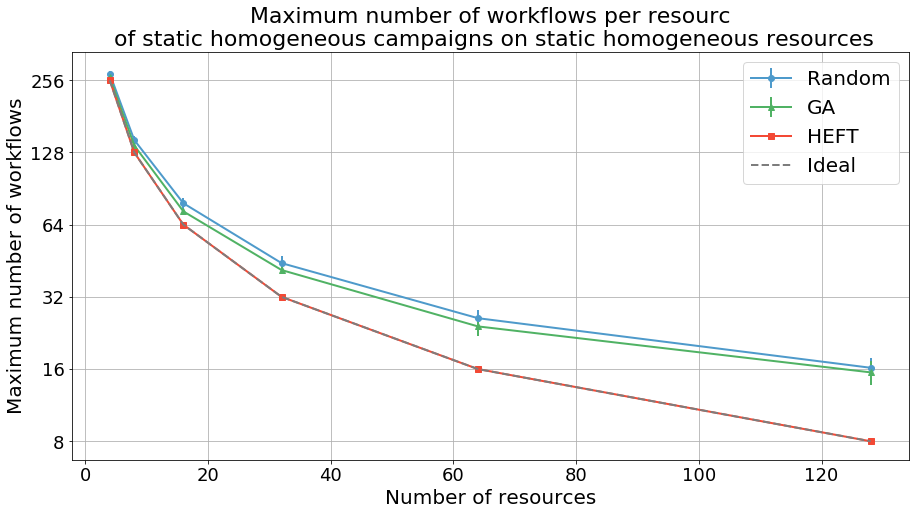

In [8]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(work_per_resource_mean.xs('RAND').index, work_per_resource_mean.xs('RAND')['freqs'].values, work_per_resource_std.xs('RAND')['freqs'].values, color=blues(150),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(work_per_resource_mean.xs('GA').index, work_per_resource_mean.xs('GA')['freqs'].values, work_per_resource_std.xs('GA')['freqs'].values, color=greens(150),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(work_per_resource_mean.xs('HEFT').index, work_per_resource_mean.xs('HEFT')['freqs'].values, color=reds(150),marker='s',label='HEFT',linewidth=2)
_ = axis.errorbar([4, 8, 16, 32, 64, 128], [256, 128, 64, 32, 16, 8], linestyle='--',label='Ideal', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log', basey=2)
_ = axis.set_ylabel('Maximum number of workflows',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.set_title('Maximum number of workflows per resourc\n of static homogeneous campaigns on static homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHomoCampaigns_4StHomoResources.png',bbox_inches='tight')

# Heterogeneous resources - Homogeneous workflows 

The following figures compare the makespan of a homogeneous campaign. As we can see from the following figure....

In [9]:
HeteroResources_StHomogeCampaigns = pd.read_csv('HeteroResources_StHomogeCampaigns.csv')

HeteroResources_StHomogeCampaigns = HeteroResources_StHomogeCampaigns.groupby(by=['planner','size'])
HeteroResources_StHomogeCampaigns_makespan_means = HeteroResources_StHomogeCampaigns.mean()
HeteroResources_StHomogeCampaigns_makespan_stds = HeteroResources_StHomogeCampaigns.std()

In [10]:
#pprint(HeteroResources_StHomogeCampaigns_makespan_means/1000)

In [11]:
#pprint(HeteroResources_StHomogeCampaigns_makespan_stds/1000)

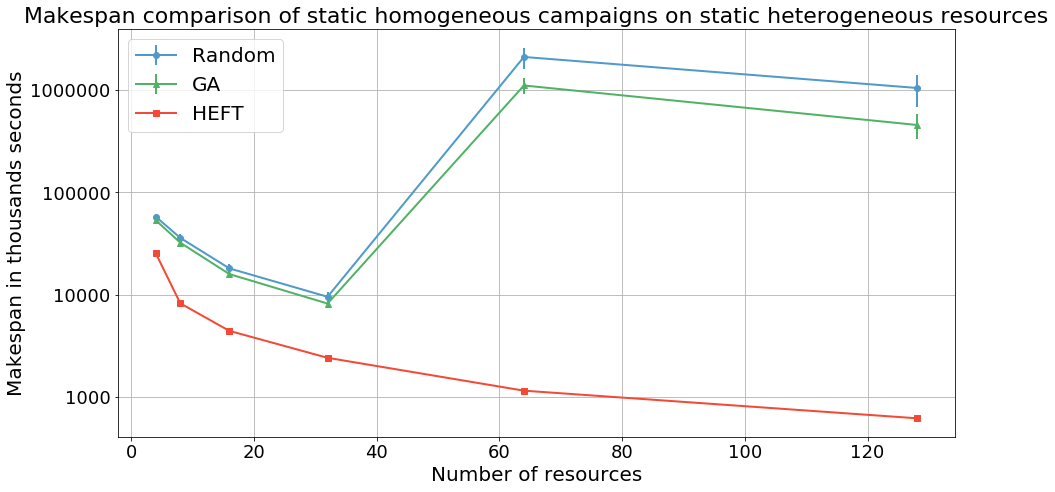

In [12]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values,HeteroResources_StHomogeCampaigns_makespan_stds.xs('RANDOM')['makespan'].values, color=blues(150),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('GA').index, HeteroResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values,HeteroResources_StHomogeCampaigns_makespan_stds.xs('GA')['makespan'].values, color=greens(150),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('HEFT').index,HeteroResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=reds(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('symlog')
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static homogeneous campaigns on static heterogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHomoCampaigns_4StHomoResources.png',bbox_inches='tight')

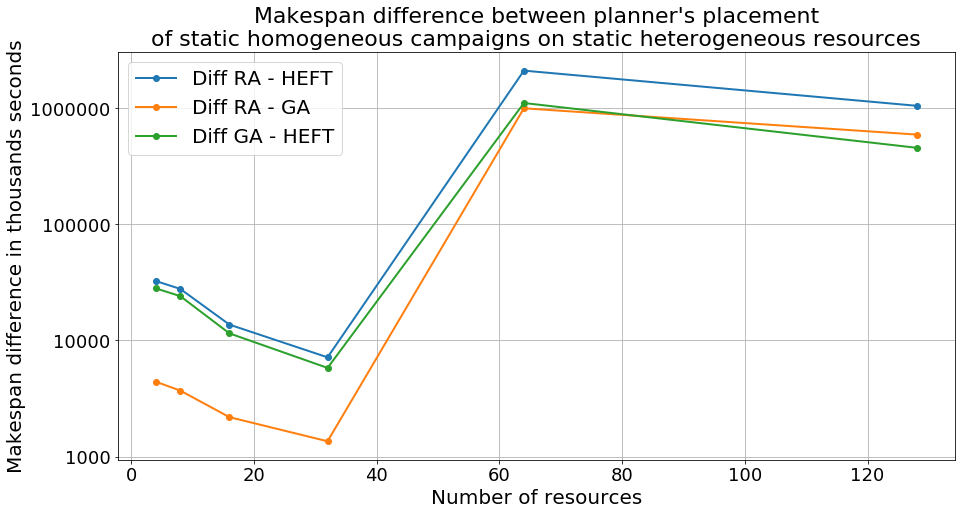

In [13]:
DiffStHomoCamp_4StHomoResHE = abs(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HeteroResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResGA = abs(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HeteroResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values)
DiffStHomoCamp_4StHomoResHEGA = (HeteroResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values - HeteroResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.plot(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT')
_ = axis.plot(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA')
_ = axis.plot(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT')
_ = axis.set_yscale('symlog')
_ = axis.set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.legend(fontsize=20)
_ = axis.set_title("Makespan difference between planner's placement\nof static homogeneous campaigns on static heterogeneous resources", fontsize=22)
#fig.savefig('StHomoCampaigns_4StHomoResources_diff.png',bbox_inches='tight')

# Heterogeneous Campaign

The following figures compare the makespan of a heterogeneous campaign. The campaign is the same as in Experiment 1. As we can see from the following figure, HEFT provides the best makespan, while the random planner has the worst makespan. What is interesting is that the random planner's makespan increases significantly for 64 and 128 resources. The random planner's makespan is not only affected the number of workflows per resource, but also by which workflows are placed in each resource. 

In [14]:
HeteroResources_StHeteroCampaigns = pd.read_csv('HeteroResources_StHeteroCampaigns.csv')

HeteroResources_StHeteroCampaigns = HeteroResources_StHeteroCampaigns.groupby(by=['planner','size'])
HeteroResources_StHeteroCampaigns_makespan_means = HeteroResources_StHeteroCampaigns.mean()
HeteroResources_StHeteroCampaigns_makespan_stds = HeteroResources_StHeteroCampaigns.std()

In [15]:
#pprint(HeteroResources_StHeteroCampaigns_makespan_means/1000)

In [16]:
#pprint(HeteroResources_StHeteroCampaigns_makespan_stds/1000)

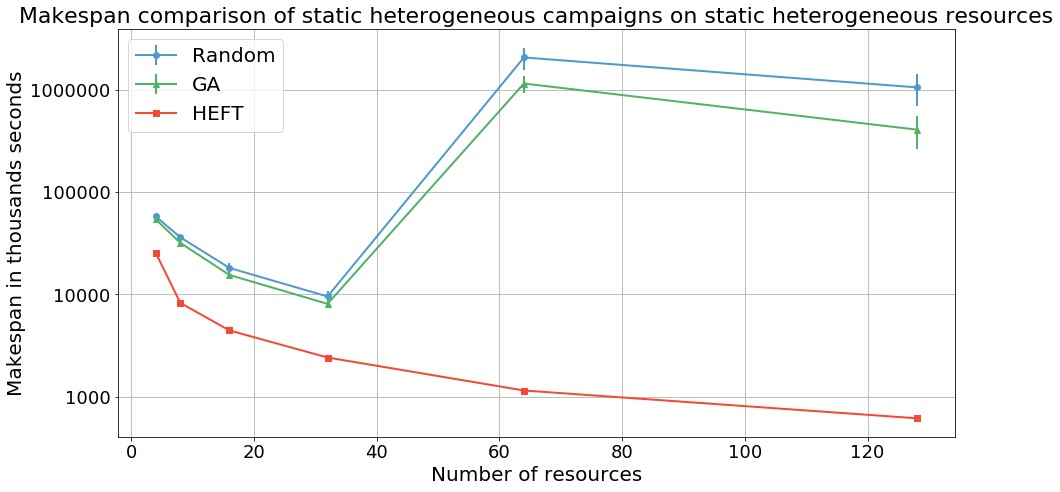

In [17]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values,HeteroResources_StHeteroCampaigns_makespan_stds.xs('RANDOM')['makespan'].values, color=blues(150),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('GA').index, HeteroResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values,HeteroResources_StHeteroCampaigns_makespan_stds.xs('GA')['makespan'].values, color=greens(150),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT').index,HeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=reds(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('symlog')
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns on static heterogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHomoCampaigns_4StHomoResources.png',bbox_inches='tight')

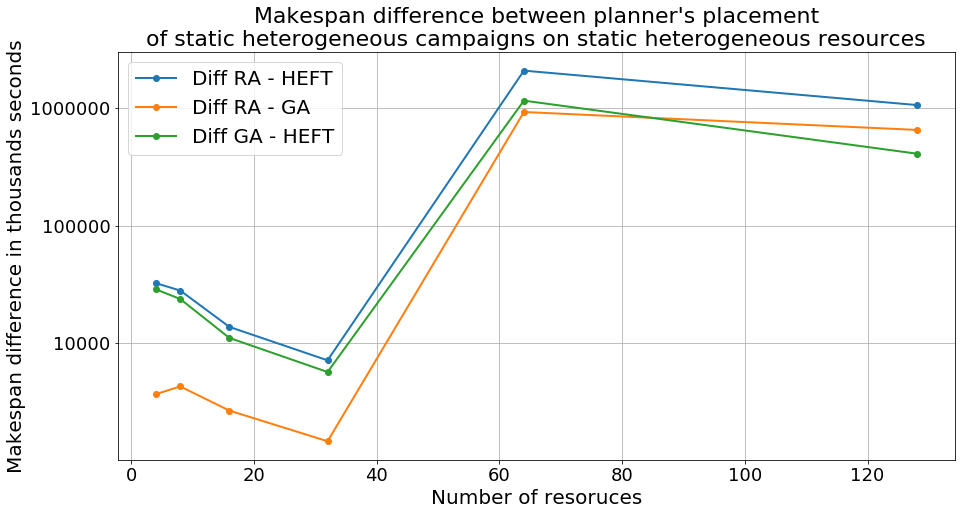

In [18]:
DiffStHomoCamp_4StHomoResHE = abs(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResGA = abs(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HeteroResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values)
DiffStHomoCamp_4StHomoResHEGA = (HeteroResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values - HeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values)
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.plot(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT')
_ = axis.plot(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA')
_ = axis.plot(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT')
_ = axis.set_yscale('symlog')
_ = axis.set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resoruces',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.legend(fontsize=20)
_ = axis.set_title("Makespan difference between planner's placement\nof static heterogeneous campaigns on static heterogeneous resources", fontsize=22)
#fig.savefig('StHomoCampaigns_4StHomoResources_diff.png',bbox_inches='tight')